In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [85]:
df.shape

(7043, 21)

# Missing Values Checking

In [86]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [87]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [88]:
df = df.replace(' ',np.NaN)

In [89]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [90]:
df.isnull().sum().sum()

11

In [91]:
df2 = df.fillna(0)
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [92]:
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Categorical Data Encoding

In [93]:
Multiplelines = pd.get_dummies(df.MultipleLines, prefix='MultipleLines')
Multiplelines

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,0,1,0
7041,0,0,1


In [94]:
InternetService = pd.get_dummies(df.InternetService, prefix='InternetService')
InternetService

,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
...,...,...,...
7038,1,0,0
7039,0,1,0
7040,1,0,0
7041,0,1,0


In [95]:
Contract = pd.get_dummies(df.Contract, prefix='Contract')
Contract

,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,1,0
7039,0,1,0
7040,1,0,0
7041,1,0,0


In [96]:
PaymentMethod = pd.get_dummies(df.PaymentMethod, prefix='Contract')
PaymentMethod

,Contract_Bank transfer (automatic),Contract_Credit card (automatic),Contract_Electronic check,Contract_Mailed check
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
7038,0,0,0,1
7039,0,1,0,0
7040,0,0,1,0
7041,0,0,0,1


In [97]:
concat = [Multiplelines, InternetService, Contract, PaymentMethod]
data1 = pd.concat([df, Multiplelines], axis=1)
data2 = pd.concat([data1, InternetService], axis=1)
data3 = pd.concat([data2, Contract], axis=1)
data_new = pd.concat([data3, PaymentMethod], axis=1)

data_new = data_new.drop(['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod'], axis=1)
data_new = data_new.replace({'No': '0', 'Yes': '1'})
data_new = data_new.replace({'Male': '0', 'Female': '1'})


data_new

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Contract_Bank transfer (automatic),Contract_Credit card (automatic),Contract_Electronic check,Contract_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,1,0,1,1,72,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,1,0,1,1,11,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,4,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


# Anomalies and Outlier Handling

In [98]:
convert = {'TotalCharges' : float}
df = df.astype(convert)
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


Periksa data apakah sudah terdistribusi normal atau belum

array([[<AxesSubplot: title={'center': 'SeniorCitizen'}>,
        <AxesSubplot: title={'center': 'tenure'}>],
       [<AxesSubplot: title={'center': 'MonthlyCharges'}>,
        <AxesSubplot: title={'center': 'TotalCharges'}>]], dtype=object)

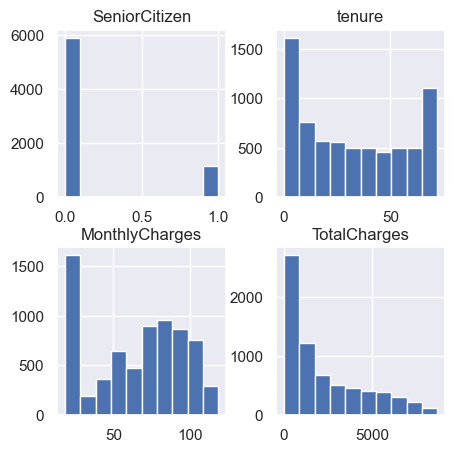

In [99]:
df.hist()

IQR Based Filtering (ketika data terdistribusi miring)

C:\Users\zaida\AppData\Local\Temp\ipykernel_15056\1017245584.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])


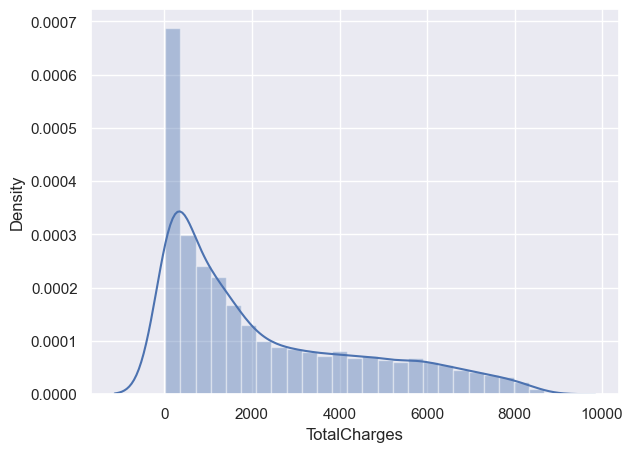

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df['TotalCharges'])
plt.show()


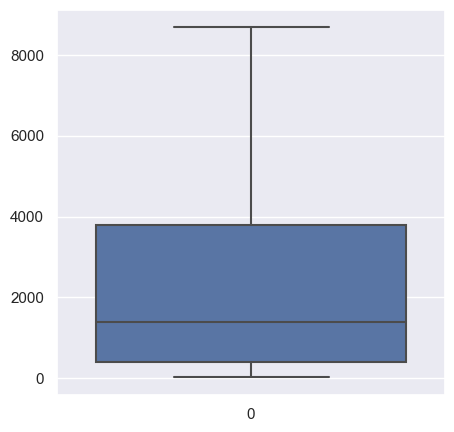

In [101]:
sns.boxplot(df['TotalCharges'])
sns.set(rc={'figure.figsize':(5,5)})

In [102]:
quartile1 = df['TotalCharges'].quantile(0.25)
quartile3 = df['TotalCharges'].quantile(0.75)
iqr = quartile3-quartile1

batas_atas = quartile3 + 1.5 * iqr
batas_bawah = quartile1 - 1.5 * iqr
batas_atas

8884.66875

In [103]:
batas_bawah

-4688.481250000001

In [104]:
# Trimming
df[df['TotalCharges'] > batas_atas]
df[df['TotalCharges'] < batas_bawah]
new_df = df[df['TotalCharges'] < batas_atas]
new_df.shape

(7032, 21)

C:\Users\zaida\AppData\Local\Temp\ipykernel_15056\1481035034.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])
C:\Users\zaida\AppData\Local\Temp\ipykernel_15056\1481035034.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['TotalCharges'])


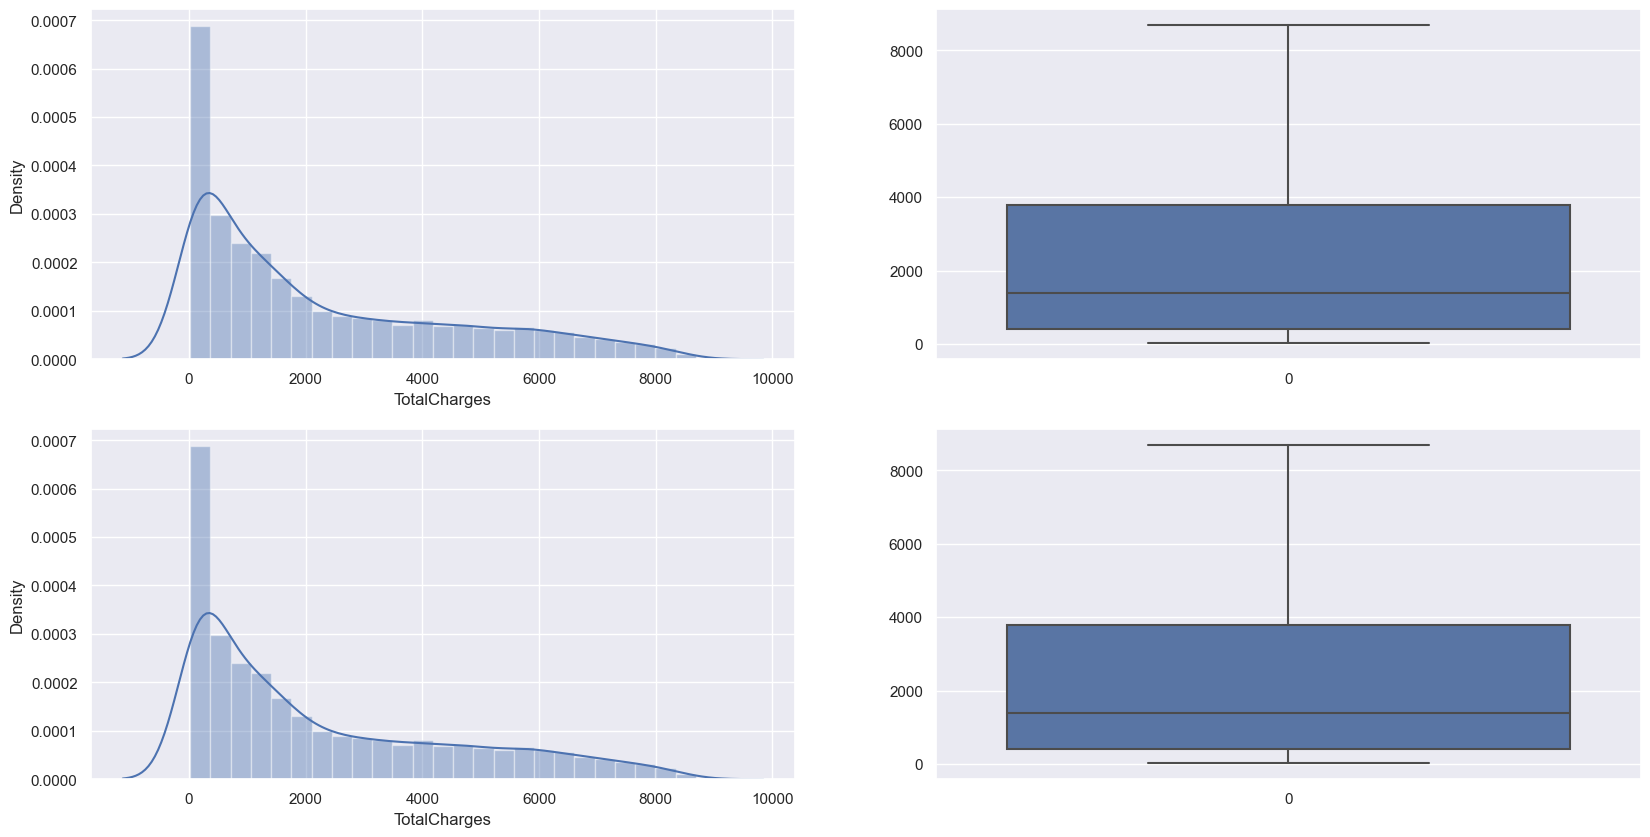

In [105]:
# Perbandingan plot data sebelum dan sesudah trimming
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(df['TotalCharges'])
plt.subplot(2,2,2)
sns.boxplot(df['TotalCharges'])
plt.subplot(2,2,3)
sns.distplot(new_df['TotalCharges'])
plt.subplot(2,2,4)
sns.boxplot(new_df['TotalCharges'])
plt.show()

In [106]:
# Capping
cap_df = df.copy()
cap_df['TotalCharges'] = np.where(
    cap_df['TotalCharges'] > batas_atas, batas_atas,
    np.where(cap_df['TotalCharges'] < batas_bawah, batas_bawah,
        cap_df['TotalCharges']
    )
)


C:\Users\zaida\AppData\Local\Temp\ipykernel_15056\2895621384.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'])
C:\Users\zaida\AppData\Local\Temp\ipykernel_15056\2895621384.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cap_df['TotalCharges'])


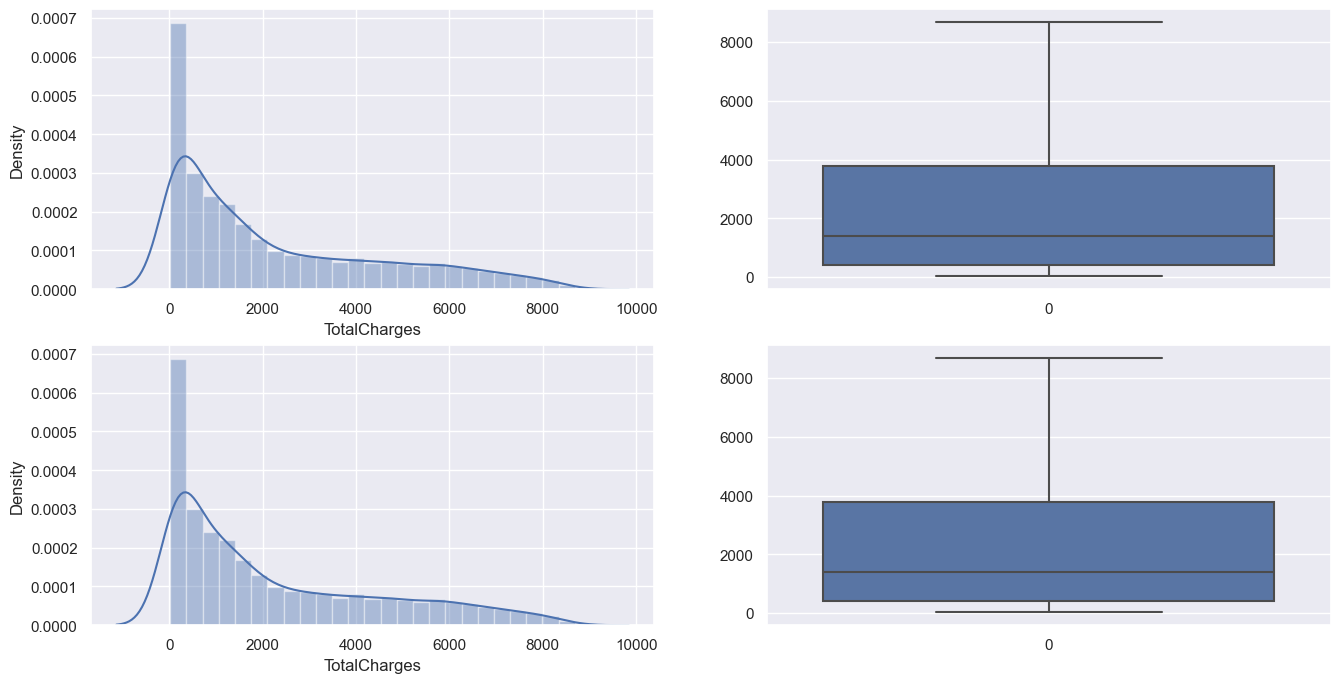

In [107]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['TotalCharges'])
plt.subplot(2,2,2)
sns.boxplot(df['TotalCharges'])
plt.subplot(2,2,3)
sns.distplot(cap_df['TotalCharges'])
plt.subplot(2,2,4)
sns.boxplot(cap_df['TotalCharges'])
plt.show()